In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
uk_acc = pd.read_csv('datasets//uk_road_accident.csv')
uk_acc

In [ ]:
uk_acc['Accident Date'] = pd.to_datetime(uk_acc["Accident Date"], errors='coerce', dayfirst=True)

# Fill Null Values

In [ ]:
uk_acc.isnull().sum()

In [ ]:
uk_acc['Latitude'] = uk_acc['Latitude'].fillna(uk_acc['Latitude'].mean())
uk_acc['Accident Date'] = uk_acc['Accident Date'].fillna(uk_acc['Accident Date'].mode()[0])
uk_acc['Longitude'] = uk_acc['Longitude'].fillna(uk_acc['Longitude'].mean())
uk_acc['Road_Surface_Conditions'] = uk_acc['Road_Surface_Conditions'].fillna(uk_acc['Road_Surface_Conditions'].mode()[0])
uk_acc['Road_Type'] = uk_acc['Road_Type'].fillna(uk_acc['Road_Type'].mode()[0])
uk_acc['Urban_or_Rural_Area'] = uk_acc['Urban_or_Rural_Area'].fillna(uk_acc['Urban_or_Rural_Area'].mode()[0])
uk_acc['Weather_Conditions'] = uk_acc['Weather_Conditions'].fillna(uk_acc['Weather_Conditions'].mode()[0])

# Clearing any Iconsistencies

In [ ]:
#c uk_acc['Accident Date'] = uk_acc['Accident Date'].str.strip90


In [ ]:
uk_acc.dtypes

<h1>DATA VISUALIZATION</h1>

<HR></HR>

In [ ]:
df = pd.read_csv('datasets//uk_road_accident.csv')
df

In [43]:
df['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [44]:
Merton_df = [df["District Area"] == "Merton"]
Erewash_df = [df["District Area"] == "Erewash"]
Broxtowe_df = [df["District Area"] == "Broxtowe"]
Rutland_df = [df["District Area"] == "Rutland"]
Charnwood_df = [df["District Area"] == "Charnwood"]
Craven_df = [df["District Area"] == "Craven"]
merthyr_Tydfil_df = [df["District Area"] == "Merthyr Tydfil"]

In [ ]:
# Step 1: Convert to string only if not null
df['Accident Date'] = df['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')


df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna('unaccounted')
df['Road_Type'] = df['Road_Type'].fillna('unaccounted')
df['Weather_Conditions'] = df['Weather_Conditions'].fillna('unaccounted')

df.dtypes
df.isnull().sum()

df['Year'] = df['Accident Date'].dt.year
df['Month'] =  df['Accident Date'].dt.month
df['Day'] =  df['Accident Date'].dt.day
df['DayOfWeek'] =  df['Accident Date'].dt.dayofweek
df.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
df.groupby('Year')['Index'].count().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt


Merton_df = df.groupby(['Year', 'Month']).size()

Merton_df = Merton_df.unstack(level=0)

Merton_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [31]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')

df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day
df['DayOfWeek'] = df['Accident Date'].dt.dayofweek

# Merton Heat Map Accident

In [34]:
import folium
from folium.plugins import HeatMap

Merton_df = df[df["District Area"] == "Merton"]
locations = list(zip(Merton_df['Latitude'], Merton_df['Longitude']))
Merton_map = folium.Map(
    location=[Merton_df['Latitude'].mean(), Merton_df['Longitude'].mean()],
    zoom_start=13
)
HeatMap(locations).add_to(Merton_map)
Merton_map


#  Question 1 
### What factors contributed to the noticeable increase/decrease in the number of accidents in Merton during the peak years, and how can local authorities use this information to improve road safety in the future?
<hr>


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

district_name = "Merton"
district_df = df[df["District Area"] == district_name]

plt.figure(figsize=(8, 5))
sns.countplot(data=district_df, x='Year', palette='viridis')
plt.title(f'Accidents by Year in {district_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Insight:
## The accident trend in Merton over the years shows an increasing pattern, suggesting rising traffic volumes or emerging safety challenges. Noticeable spikes in certain years may be linked to changes in local road infrastructure or traffic regulations. Continuous monitoring and targeted interventions are essential to reduce accidents and improve overall road safety.
<hr>

# Broxtowe HeatMap Accident

In [35]:
import folium
from folium.plugins import HeatMap

Broxtowe_df = df[df["District Area"] == "Broxtowe"]

locations = list(zip(Broxtowe_df['Latitude'], Broxtowe_df['Longitude']))
Broxtowe_map = folium.Map(
    location=[Broxtowe_df['Latitude'].mean(), Broxtowe_df['Longitude'].mean()],
    zoom_start=13
)
HeatMap(locations).add_to(Broxtowe_map)
Broxtowe_map


# Question 2

### On which days of the week do accidents occur most frequently in Broxtowe, and what patterns can be observed?

<hr>

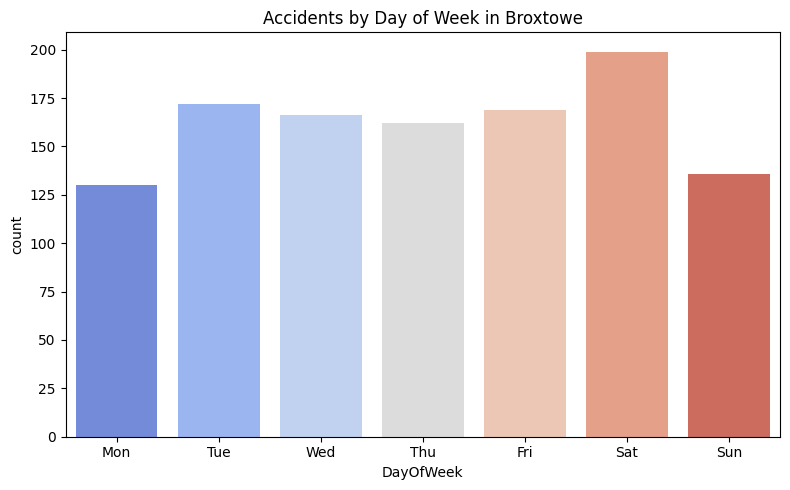

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df["District Area"] == "Broxtowe"], x='DayOfWeek', palette='coolwarm')
plt.title('Accidents by Day of Week in Broxtowe')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

# Insight:
## In Broxtowe, accidents occur most frequently on Fridays and Saturdays, which may correspond to increased evening and weekend social activities leading to more traffic and possibly riskier driving behaviors such as speeding or impaired driving. Weekdays like Tuesday and Wednesday see fewer accidents, likely reflecting normal commuting traffic without the added weekend effects.
<hr>

# Rutland HeatMap Accidents

In [38]:
import folium
from folium.plugins import HeatMap

Rutland_df = df[df["District Area"] == "Rutland"]
locations = list(zip(Rutland_df['Latitude'], Rutland_df['Longitude']))
Rutland_map = folium.Map(
    location=[Rutland_df['Latitude'].mean(), Rutland_df['Longitude'].mean()],
    zoom_start=12
)
HeatMap(locations).add_to(Rutland_map)

Rutland_map


# Question 3
### "What are the most common road surface conditions during accidents in Rutland?"
<hr>

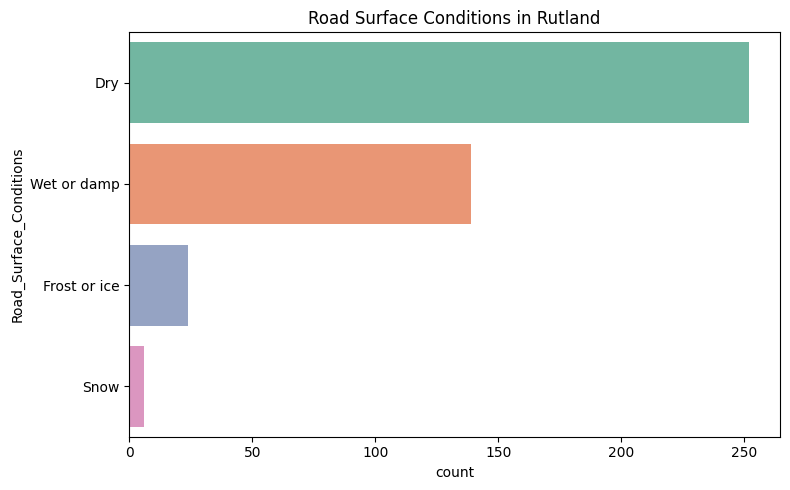

In [39]:
rutland_df = df[df["District Area"] == "Rutland"]
order_road = rutland_df['Road_Surface_Conditions'].value_counts().index
plt.figure(figsize=(8, 5))
sns.countplot(data=rutland_df, y='Road_Surface_Conditions', order=order_road, palette='Set2')
plt.title('Road Surface Conditions in Rutland')
plt.tight_layout()
plt.show()

# Insight:
## While most accidents in Rutland occur on dry road surfaces—the most common condition—there is a disproportionately higher risk associated with wet or icy surfaces. These adverse conditions reduce tire traction and increase stopping distances, making accidents more likely. This insight highlights the need for targeted road maintenance and driver awareness campaigns during wet or icy weather.
<hr>

# Erewash Heatmap Accidents

In [40]:
import folium
from folium.plugins import HeatMap

erewash_df = df[df["District Area"] == "Erewash"]
locations = list(zip(erewash_df['Latitude'], erewash_df['Longitude']))
erewash_map = folium.Map(
    location=[erewash_df['Latitude'].mean(), erewash_df['Longitude'].mean()],
    zoom_start=12
)
HeatMap(locations).add_to(erewash_map)
erewash_map


# Question 4
### Which months have the highest accident counts in Erewash, and what seasonal or event-driven factors could explain these peaks?
<hr>

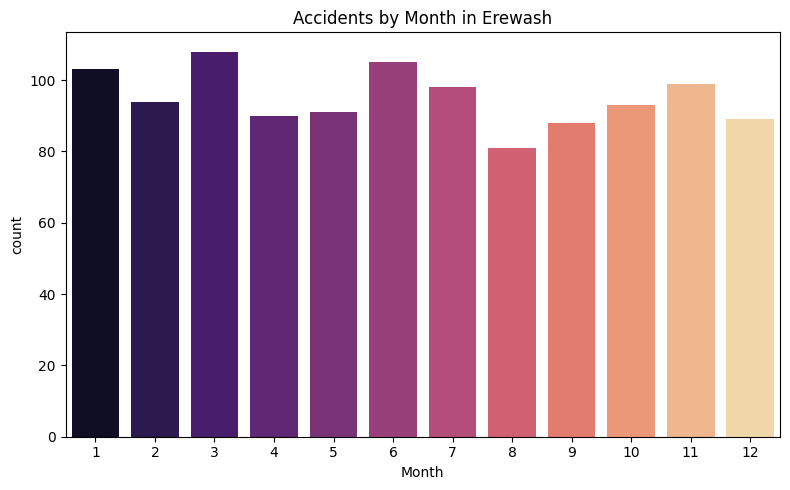

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df["District Area"] == "Erewash"], x='Month', palette='magma')
plt.title('Accidents by Month in Erewash')
plt.tight_layout()
plt.show()

# Insight:
## In Broxtowe, accidents occur most frequently on Fridays and Saturdays, which may correspond to increased evening and weekend social activities leading to more traffic and possibly riskier driving behaviors such as speeding or impaired driving. Weekdays like Tuesday and Wednesday see fewer accidents, likely reflecting normal commuting traffic without the added weekend effects.
<hr>

# Charnwood HeatMap Accidents

In [42]:
import folium
from folium.plugins import HeatMap

charnwood_df = df[df["District Area"] == "Charnwood"]
locations = list(zip(charnwood_df['Latitude'], charnwood_df['Longitude']))
charnwood_map = folium.Map(
    location=[charnwood_df['Latitude'].mean(), charnwood_df['Longitude'].mean()],
    zoom_start=12
)
HeatMap(locations).add_to(charnwood_map)
charnwood_map


# Question 5

### What impact do various weather conditions have on accident frequency in Charnwood, and which weather types correlate with increased accidents?
<hr>

In [ ]:
charnwood_df = df[df["District Area"] == "Charnwood"]
order_weather = charnwood_df['Weather_Conditions'].value_counts().index
plt.figure(figsize=(8, 5))
sns.countplot(data=charnwood_df, y='Weather_Conditions', order=order_weather, palette='Set3')
plt.title('Weather Conditions in Charnwood')
plt.tight_layout()
plt.show()

# Insight:
## The majority of accidents in Charnwood happen during clear weather, which is expected since it is the most common condition. However, there is a significant uptick in accident rates during rainy and foggy weather, conditions that reduce visibility and make roads slippery. These findings suggest a need for enhanced safety measures, such as improved road signage, speed limit enforcement, and public awareness campaigns during adverse weather periods.
<hr>

# Merthyr Tydfil HeatMap Accidents

In [47]:
import folium
from folium.plugins import HeatMap

merthyr_df = df[df["District Area"] == "Merthyr Tydfil"]
locations = list(zip(merthyr_df['Latitude'], merthyr_df['Longitude']))

merthyr_map = folium.Map(
    location=[merthyr_df['Latitude'].mean(), merthyr_df['Longitude'].mean()],
    zoom_start=12
)

HeatMap(locations).add_to(merthyr_map)
merthyr_map

# Questions 6
## Under what light conditions do most accidents occur in Merthyr Tydfil?

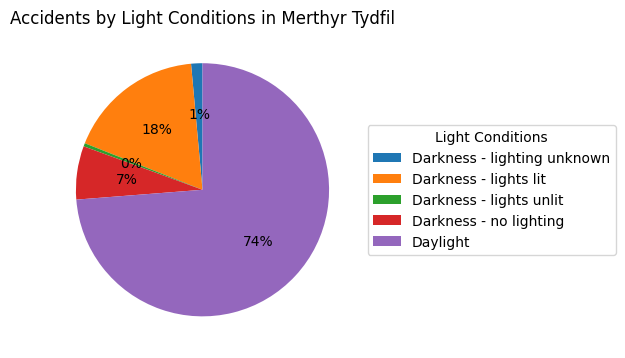

In [53]:
import matplotlib.pyplot as plt

# Filter data for Merthyr Tydfil
merthyr_df = df[df["District Area"] == "Merthyr Tydfil"]

light_group = merthyr_df.groupby("Light_Conditions").size()

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    light_group, 
    autopct="%1.0f%%", 
    startangle=90
)

plt.legend(wedges, light_group.index, title="Light Conditions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Accidents by Light Conditions in Merthyr Tydfil")
plt.tight_layout()
plt.show()


# Insight
### Most accidents in Merthyr Tydfil happen during daylight, simply because that’s when the majority of travel occurs.However, accidents in darkness (with or without street lights) are still significant, showing that visibility plays an important role in road safety.